In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataframe_procesada=pd.read_csv("../data/processed/datos_procesados.csv",index_col=False)

In [44]:
dataframe_procesada.columns

Index(['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'male', 'Dropout',
       'white', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'tier',
       'indxgrp', 'gpa'],
      dtype='object')

In [20]:
dataframe_procesada

,ID,lsat,grad,zgpa,fulltime,fam_inc,male,Dropout,white,other,asian,black,hisp,pass_bar,tier,indxgrp,gpa
0,2,44.0,1,1.88,1.0,5.0,0.0,1,1.0,0,0,0,0,1,4.0,7,3.5
1,3,29.0,1,-0.57,1.0,4.0,0.0,1,1.0,0,0,0,0,1,2.0,6,3.5
2,36,36.0,1,-1.12,1.0,1.0,1.0,1,1.0,0,0,0,0,1,3.0,7,3.5
3,52,39.0,1,-0.49,1.0,4.0,1.0,1,1.0,0,0,0,0,1,3.0,7,3.5
4,55,48.0,1,0.76,1.0,4.0,1.0,1,1.0,0,0,0,0,1,5.0,7,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22402,10695,26.5,1,-1.49,1.0,2.0,1.0,1,0.0,0,0,1,0,0,1.0,2,1.8
22403,19642,19.7,1,-1.36,1.0,3.0,1.0,1,0.0,0,0,1,0,0,1.0,1,1.8
22404,24704,36.0,1,0.80,2.0,3.0,1.0,1,0.0,0,0,1,0,1,3.0,5,1.8
22405,10000,44.0,1,1.42,2.0,3.0,1.0,1,1.0,0,0,0,0,1,3.0,6,1.5


Vamos a usar diferentes versiones del mismo dataframe para ver si la raza y el género vuelve sesgado al modelo o no. Tambien vamos a quitar la columna dnn_bar_pass_prediction, porque sería trabajar con las predicciones de otro modelo o persona.

Aparte tambien debemos observar si el target nos va a servir para un modelo de clasificación (parece que no).

In [4]:
dataframe_procesada["pass_bar"].value_counts()

pass_bar
1    21238
0     1169
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1eefe22f850>,
 [Text(-1.085258177997758, 0.1794845037572519, 'Aprobado'),
  Text(1.085258192701737, -0.1794844148491985, 'Supenso')],
 [Text(-0.5919590061805952, 0.09790063841304647, '94.8%'),
  Text(0.5919590142009474, -0.09790058991774463, '5.2%')])

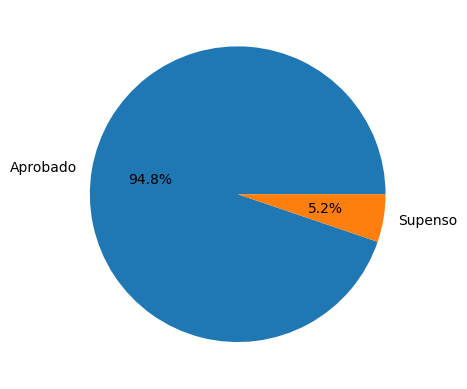

In [5]:
plt.subplot()
plt.pie(dataframe_procesada["pass_bar"].value_counts(),labels=["Aprobado","Supenso"], autopct='%1.1f%%')

Intentemos usar primero arboles de decisión para ver si sacamos algo en claro sobre la importancia de cada feature, antes de usar tecnicas de over sampling. Otra posibilidad es usar el hiperparametro class weights en otros modelos y a ver a que nos lleva.

In [45]:
from sklearn.model_selection import train_test_split
seed=22

X_train_ryg, X_test_ryg, y_train_ryg, y_test_ryg = train_test_split(dataframe_procesada.drop(['pass_bar'], axis=1),
                                                    dataframe_procesada['pass_bar'],
                                                    test_size=0.25,
                                                    random_state=seed)

Vamos a guardar estos datos:

In [7]:
X_train_ryg.to_csv("../data/train/datos_procesados_Xtrain_ryg.csv",index=False)
X_test_ryg.to_csv("../data/test/datos_procesados_Xtest_ryg.csv",index=False)
y_train_ryg.to_csv("../data/train/datos_procesados_ytrain_ryg.csv",index=False)
y_test_ryg.to_csv("../data/test/datos_procesados_ytest_ryg.csv",index=False)

(Esto va a contar como un modelo, a pesar de que solo lo haga para ver a que features le da más importancia para clasificar)

1. Modelo Decision Tree

Vamos a usar el score como una medida aproximada de si funciona bien o mal. Veremos más metricas más adelante

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_clf_param={"random_state":[seed],
                "max_depth":[1,2,3],
                "criterion":["gini", "entropy", "log_loss"],
                "splitter":["best","random"],
                "min_samples_split":[2,3,5,8,10],
                "min_samples_leaf":[1,2,3,5,8,10],
                "min_weight_fraction_leaf":[0.0,0.25,0.5],
                "class_weight":[None,"balanced"],
                "ccp_alpha":[0.0,0.25,0.5]}

tree_clf_puro = DecisionTreeClassifier()
tree_clf_puro=GridSearchCV(tree_clf_puro,tree_clf_param,refit=True)

In [46]:
tree_clf_puro.fit(X_train_ryg, y_train_ryg)
tree_clf=tree_clf_puro.best_estimator_
print(tree_clf.score(X_train_ryg,y_train_ryg))
print(tree_clf.score(X_test_ryg,y_test_ryg))

KeyboardInterrupt: 

In [ ]:
tree_clf_puro.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 22,
 'splitter': 'best'}

Vemos que hay una importancia muy grande en las features lsat y lgpa.

3


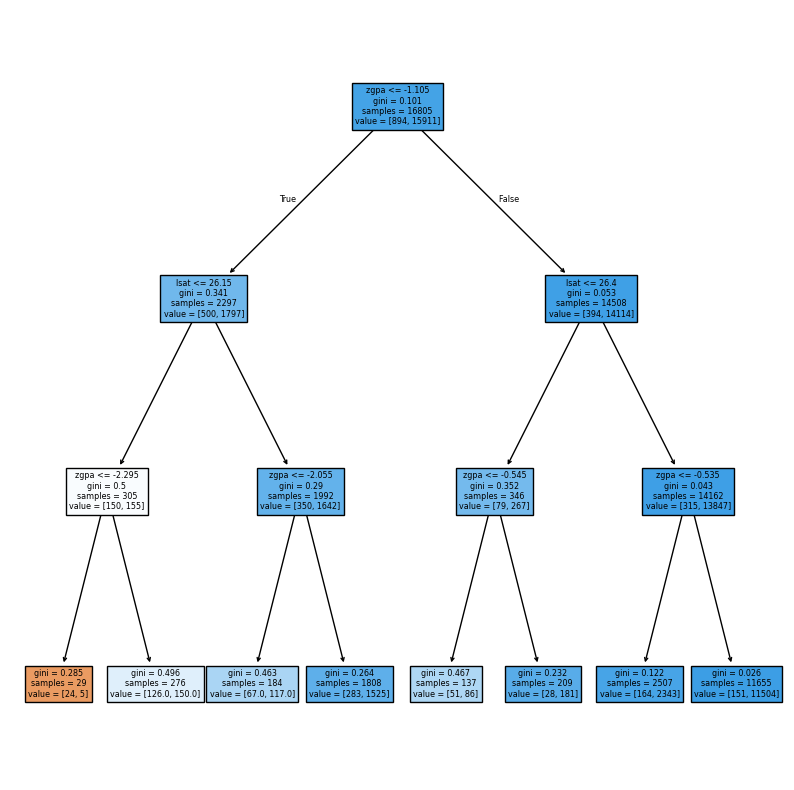

In [ ]:
from sklearn.tree import plot_tree
print(tree_clf.get_depth())
plt.figure(figsize=(10,10))

plot_tree(tree_clf,
               feature_names=X_train_ryg.columns,
               filled = True);

La importancia de cada feature nos muestra que las dos principales razas (en términos númericos), blanca y negra, están entre las cinco features con mayor importancia según el score. 

In [9]:
dataframe_procesada.columns

Index(['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'male', 'Dropout',
       'white', 'other', 'asian', 'black', 'hisp', 'pass_bar', 'tier',
       'indxgrp', 'gpa'],
      dtype='object')

In [10]:
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(k=10)
X_new = sel.fit_transform(dataframe_procesada.drop(["pass_bar"],axis=1), dataframe_procesada["pass_bar"])
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': ['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'male',
       'Dropout', 'white', 'other', 'asian', 'black', 'hisp',
       'tier', 'indxgrp', 'gpa'], 'score': sel.scores_}).sort_values('score', ascending=False)

(22407, 10)
[1.49661347e-01 1.35067594e+03 8.57954636e+01 1.77603429e+03
 9.96478530e+01 1.44286510e+02 1.11337453e+01 5.50405085e-02
 8.17989653e+02 2.16808103e+01 1.26492190e+01 8.64216891e+02
 3.54340564e+01 2.15967761e+02 2.07060681e+03 4.69571550e+02]


,column,score
14,indxgrp,2070.606810
3,zgpa,1776.034289
1,lsat,1350.675937
11,black,864.216891
8,white,817.989653
15,gpa,469.571550
13,tier,215.967761
5,fam_inc,144.286510
4,fulltime,99.647853
2,grad,85.795464


Las mismas features pero su importancia según el modelo de tree_clf. Aquí vemos que las features más relevantes fueron las mismas que vimos antes (zgpa y lsat), siendo las demás ignoradas. Parece que usando este tipo de modelo podrías deshacernos de las features controversiales de raza y género sin perder mucho.

In [208]:
scores = sorted(zip(map(lambda x: round(x, 4), tree_clf.feature_importances_), X_test_ryg.columns), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])

,Score,Feature
0,0.6956,zgpa
1,0.3044,lsat
2,0.0000,white
3,0.0000,tier
4,0.0000,other
5,0.0000,male
6,0.0000,indxgrp
7,0.0000,hisp
8,0.0000,grad
9,0.0000,gpa


Oversampling

In [47]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=seed)
X_ros, y_ros = ros.fit_resample(dataframe_procesada.drop(["pass_bar"],axis=1), dataframe_procesada['pass_bar'])

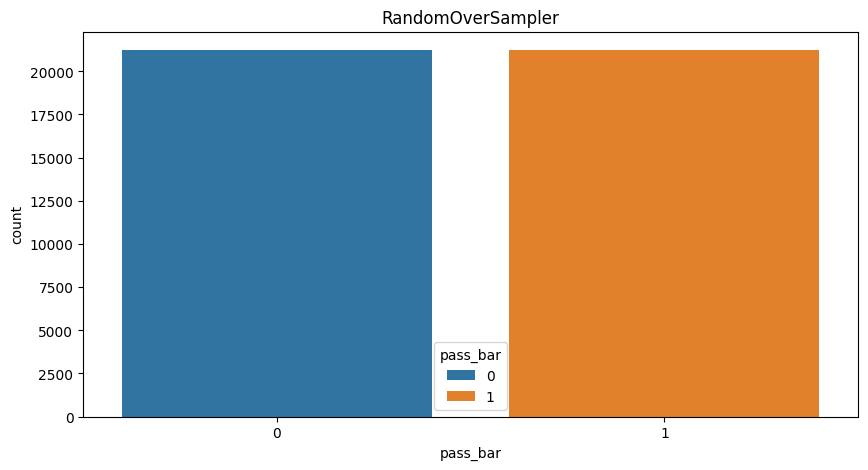

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(10, 5), sharey=True)

sns.countplot(x=y_ros, ax=axes, hue=y_ros)
axes.set_title("RandomOverSampler");

Vemos que los datos, los cuales solo los vamos a usar para entrenar el modelo, ahora son más "balanceados".

In [9]:
X_ros

,ID,lsat,grad,zgpa,fulltime,fam_inc,male,Dropout,white,other,asian,black,hisp,tier,indxgrp,gpa
0,2,44.0,1,1.88,1.0,5.0,0.0,1,1.0,0,0,0,0,4.0,7,3.5
1,3,29.0,1,-0.57,1.0,4.0,0.0,1,1.0,0,0,0,0,2.0,6,3.5
2,36,36.0,1,-1.12,1.0,1.0,1.0,1,1.0,0,0,0,0,3.0,7,3.5
3,52,39.0,1,-0.49,1.0,4.0,1.0,1,1.0,0,0,0,0,3.0,7,3.5
4,55,48.0,1,0.76,1.0,4.0,1.0,1,1.0,0,0,0,0,5.0,7,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42471,4859,28.0,1,0.46,1.0,3.0,0.0,1,1.0,0,0,0,0,1.0,5,3.4
42472,6877,35.0,1,-0.87,1.0,4.0,0.0,1,1.0,0,0,0,0,3.0,7,3.4
42473,16844,37.0,1,-1.68,1.0,4.0,1.0,1,1.0,0,0,0,0,2.0,5,2.0
42474,684,37.0,1,-2.11,1.0,3.0,0.0,1,1.0,0,0,0,0,3.0,7,3.8


In [10]:
y_ros

0        1
1        1
2        1
3        1
4        1
        ..
42471    0
42472    0
42473    0
42474    0
42475    0
Name: pass_bar, Length: 42476, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
seed=22

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros,
                                                    y_ros,
                                                    test_size=0.25,
                                                    random_state=seed)

Vamos a guardar estos datos:

In [14]:
X_train_ros.to_csv("../data/train/datos_procesados_Xtrain_ros.csv",index=False)
X_test_ros.to_csv("../data/test/datos_procesados_Xtest_ros.csv",index=False)
y_train_ros.to_csv("../data/train/datos_procesados_ytrain_ros.csv",index=False)
y_test_ros.to_csv("../data/test/datos_procesados_ytest_ros.csv",index=False)

Una vez tenemos datos con los que entrenar modelos, empecemos a probar con ellos. Necesitamos 4 supervisados y 1 no supervisado más.

2. Modelo de Random Forest (este tardara más)

Hiperparametros del modelo de clasificación

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

forest_clf_param={"n_estimators":[5,10,25],
                "random_state":[seed],
                "max_depth":[1,2,3],
                "criterion":["gini", "entropy", "log_loss"],
                "bootstrap":[True,False],
                "min_samples_split":[2,3,5],
                "min_samples_leaf":[1,3,5],
                "min_weight_fraction_leaf":[0.0,0.25],
                "class_weight":[None,"balanced"],
                "ccp_alpha":[0.0,0.25],
                "warm_start":[True,False]}

forest_clf_puro= RandomForestClassifier()
forest_clf_puro=GridSearchCV(forest_clf_puro,forest_clf_param,refit=True)

In [67]:
forest_clf_puro.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 22,
 'verbose': 0,
 'warm_start': False}

In [122]:
forest_clf_puro.fit(X_train_ryg, y_train_ryg)
forest_clf=forest_clf_puro.best_estimator_
print(forest_clf.score(X_train_ryg,y_train_ryg))
print(forest_clf.score(X_test_ryg,y_test_ryg))

0.9475751264504612
0.9503748661192432


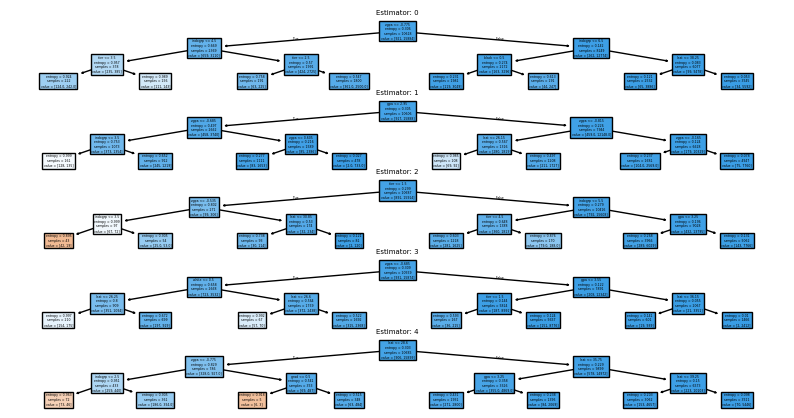

In [79]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 5,ncols = 1,figsize = (10,5))

for i in range(0,5):
    plot_tree(forest_clf[i],
               feature_names=X_train_ryg.columns,
               filled = True,
               ax=axes[i]);
    axes[i].set_title('Estimator: ' + str(i), fontsize = 5)

3. Modelo Logistic Regression (vamos a usar los datos oversampleados para entrenar y los datos procesados para las mediciones)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
simplefilter("ignore") #habia demasiadas warnings de funciones obsoletas en las proximas versiones
reglog_clf_param={"penalty":[None,"l1", "l2", "elasticnet"],
                "random_state":[seed],
                "dual":[True,False],
                "tol":[1e-4,1e-1],
                "C":[0.1,1.0],
                "fit_intercept":[True,False],
                "intercept_scaling":[0.1,1.0],
                "solver":["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
                "max_iter":[100],
                "multi_class":["auto", "ovr", "multinomial"],
                "l1_ratio":[0.0,1.0],
                "verbose":[0]}

reglog_clf_puro = LogisticRegression()
reglog_clf_puro=GridSearchCV(reglog_clf_puro,reglog_clf_param,refit=True)

In [120]:
reglog_clf_puro.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': False,
 'intercept_scaling': 0.1,
 'l1_ratio': 0.0,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 22,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [31]:
reglog_clf_puro.fit(X_train_ros,y_train_ros)
reglog_clf=reglog_clf_puro.best_estimator_
print(reglog_clf.score(X_test_ros,y_test_ros))
print(reglog_clf.score(X_test_ryg,y_test_ryg))

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave 

0.7969676994067239
0.7870403427347376


4. Modelo SVC (vectores y kernels)

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_clf_param={"C":[0.1,1.0],
                "random_state":[seed],
                "kernel":["linear", "poly", "rbf", "sigmoid"],
                "coef0":[0.0,0.1],
                "degree":[1,3,5],
                "gamma":["scale","auto"],
                "shrinking":[True,False],
                "probability":[True],
                "tol":[1e-3,1e-1],
                "class_weight":[None,"balanced"],
                "max_iter":[15],
                "decision_function_shape":["ovo", "ovr"],
                "break_ties":[True,False]}

svc_clf_puro = SVC()
svc_clf_puro=GridSearchCV(svc_clf_puro,svc_clf_param,refit=True)


In [152]:
svc_clf_puro.get_params()

{'C': 1.0,
 'break_ties': True,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': 15,
 'probability': True,
 'random_state': 22,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [30]:
svc_clf_puro.fit(X_train_ros,y_train_ros)
svc_clf=svc_clf_puro.best_estimator_
print(svc_clf.score(X_test_ros,y_test_ros))
print(svc_clf.score(X_test_ryg,y_test_ryg))

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Compe

0.49656276485544776
0.25365940735451625


c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


5. Modelo KNClassifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf_param={"n_neighbors":[1,2,3,5,10],
                "weights":["uniform","distance"],
                "algorithm":["auto", "ball_tree", "kd_tree","brute"],
                "leaf_size":[5,10,30],
                "p":[0.0,1.0,2.0,3.0],
                "metric":["minkowski"]}

knn_clf_puro = KNeighborsClassifier()
knn_clf_puro=GridSearchCV(knn_clf_puro,knn_clf_param,refit=True)

In [31]:
knn_clf_puro.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 5,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 1.0,
 'weights': 'uniform'}

In [29]:
knn_clf_puro.fit(X_train_ros,y_train_ros)
knn_clf=knn_clf_puro.best_estimator_
print(knn_clf.score(X_test_ryg,y_test_ryg))
print(knn_clf.score(X_test_ros,y_test_ros))

0.985362370581935
0.978246539222149


Modelo No Supervisado

1. Modelo KMeans 

In [71]:
from sklearn.cluster import KMeans

km_clf_param={"n_clusters":[2],
                "random_state":[seed],
                "init":["k-means++", "random"],
                "n_init":["auto","random"],
                "max_iter":[100,200,300],
                "tol":[1e-4,1e-2,1e-1],
                "copy_x":[True,False],
                "algorithm":["lloyd","elkan"]}

km_clf_puro = KMeans()
km_clf_puro=GridSearchCV(km_clf_puro,km_clf_param,refit=True)

In [34]:
km_clf_puro.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 22,
 'splitter': 'best'}

El score no nos sirve para saber si lo hemos hecho bien o mal de primeras. Intentemos ver la inertia.

In [28]:
km_clf_puro.fit(X_train_ros,y_train_ros)
km_clf=km_clf_puro.best_estimator_
print(km_clf.score(X_train_ryg,y_train_ryg))
print(km_clf.score(X_test_ros,y_test_ros))

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failu

-88059719836.9299
-164988332603.79666


In [143]:
km_clf.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [131]:
km_clf.inertia_

657923919598.318

Metricas de los modelos

In [7]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

predicciones_tree=tree_clf.predict(X_test_ryg)
predicciones_forest=forest_clf.predict(X_test_ryg)
predicciones_reglog=reglog_clf.predict(X_test_ros)
predicciones_svc=svc_clf.predict(X_test_ros)
predicciones_knn=knn_clf.predict(X_test_ros)
predicciones_km=km_clf.predict(X_test_ros)

print(predicciones_tree)
print(predicciones_forest)
print(predicciones_reglog)
print(predicciones_svc)
print(predicciones_knn)
print(predicciones_km)


[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 0 ... 1 1 0]
[0 0 1 ... 0 0 0]
[1 1 0 ... 0 1 0]
[1 1 1 ... 1 1 1]


1. Modelo Tree

In [40]:
print(f"AUC: "+str(accuracy_score(predicciones_tree,y_test_ryg)))
print(f"F1-Score:"+str(f1_score(predicciones_tree,y_test_ryg)))
print(f"Precision Score: "+str(precision_score(predicciones_tree,y_test_ryg)))
print(f"Recall Score: "+str(recall_score(predicciones_tree,y_test_ryg)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_tree,y_test_ryg)))
print(f"ROC: "+str(roc_curve(predicciones_tree,y_test_ryg)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_tree,y_test_ryg)))
print(f"Specificity: "+str(recall_score(predicciones_tree,y_test_ryg,pos_label=0)))

AUC: 0.9509103891467333
F1-Score:0.9748283752860412
Precision Score: 0.9996245541580627
Recall Score: 0.9512325830653805
ROC-AUC Score: 0.7256162915326902
ROC: (array([0. , 0.5, 1. ]), array([0.        , 0.95123258, 1.        ]), array([inf,  1.,  0.]))
Precision Recall: (array([0.99928597, 0.99962455, 1.        ]), array([1.        , 0.95123258, 0.        ]), array([0, 1], dtype=int64))
Specificity: 0.5


<Axes: >

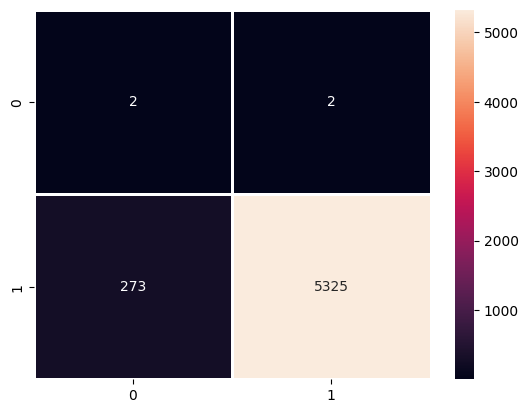

In [54]:
sns.heatmap((confusion_matrix(predicciones_tree,y_test_ryg)),linewidths=1,annot=True,fmt="d")

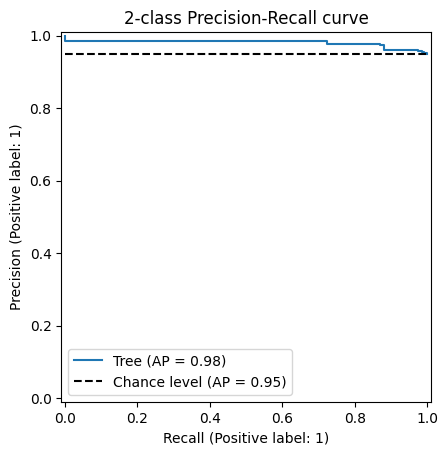

In [13]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    tree_clf,X_test_ryg, y_test_ryg, name="Tree", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

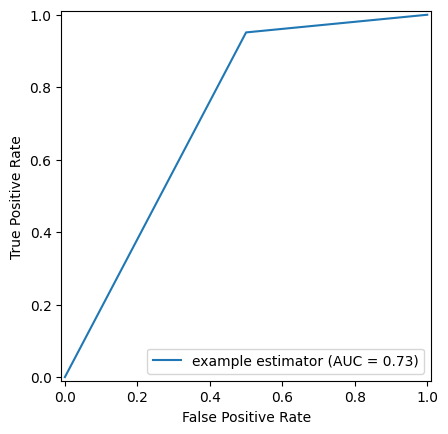

In [22]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(predicciones_tree,y_test_ryg)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

<Axes: >

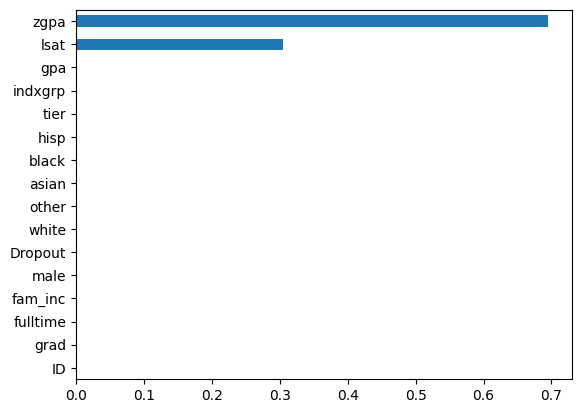

In [14]:
feat_importances = pd.Series(tree_clf.feature_importances_, index = X_train_ryg.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')

2. Modelo Forest

In [39]:
print(f"AUC: "+str(accuracy_score(predicciones_forest,y_test_ryg)))
print(f"F1-Score:"+str(f1_score(predicciones_forest,y_test_ryg)))
print(f"Precision Score: "+str(precision_score(predicciones_forest,y_test_ryg)))
print(f"Recall Score: "+str(recall_score(predicciones_forest,y_test_ryg)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_forest,y_test_ryg)))
print(f"ROC: "+str(roc_curve(predicciones_forest,y_test_ryg)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_forest,y_test_ryg)))
print(f"Specificity: "+str(recall_score(predicciones_forest,y_test_ryg,pos_label=0)))

AUC: 0.9503748661192432
F1-Score:0.9745327958959326
Precision Score: 0.9984982166322508
Recall Score: 0.9516908212560387
ROC-AUC Score: 0.6681531029357116
ROC: (array([0.        , 0.61538462, 1.        ]), array([0.        , 0.95169082, 1.        ]), array([inf,  1.,  0.]))
Precision Recall: (array([0.9976794 , 0.99849822, 1.        ]), array([1.        , 0.95169082, 0.        ]), array([0, 1], dtype=int64))
Specificity: 0.38461538461538464


<Axes: >

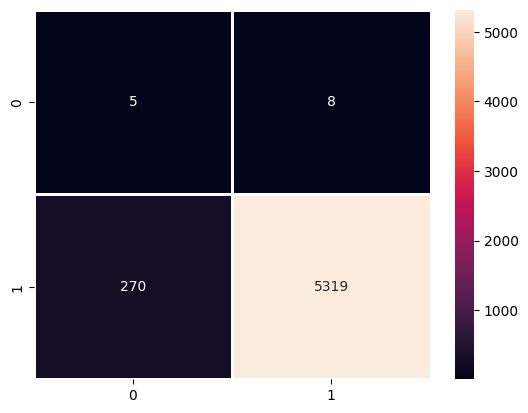

In [58]:
sns.heatmap((confusion_matrix(predicciones_forest,y_test_ryg)),linewidths=1,annot=True,fmt="d")

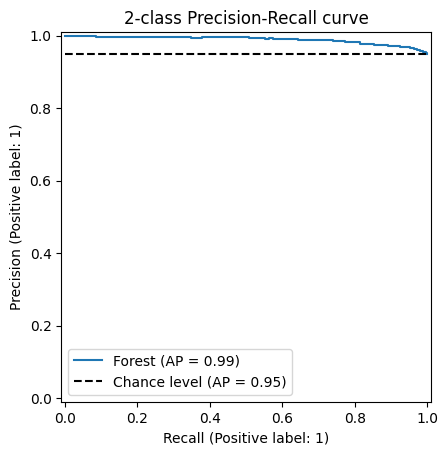

In [17]:
display = PrecisionRecallDisplay.from_estimator(
    forest_clf,X_test_ryg, y_test_ryg, name="Forest", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

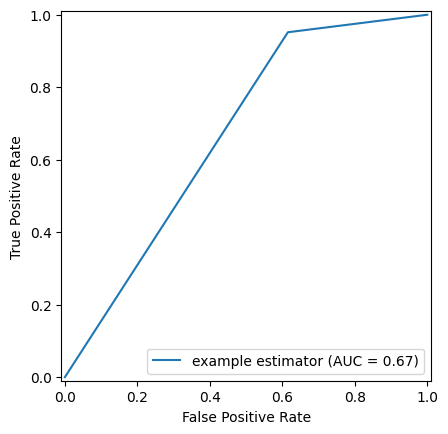

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(predicciones_forest,y_test_ryg)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

<Axes: >

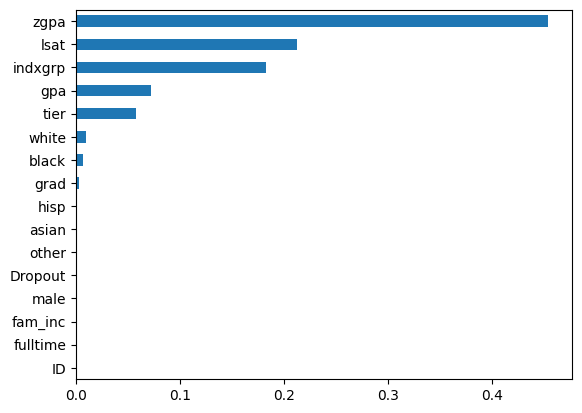

In [15]:
feat_importances = pd.Series(forest_clf.feature_importances_, index = X_train_ryg.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')

3. Modelo Regresion Log.

In [41]:
print(f"AUC: "+str(accuracy_score(predicciones_reglog,y_test_ros)))
print(f"F1-Score:"+str(f1_score(predicciones_reglog,y_test_ros)))
print(f"Precision Score: "+str(precision_score(predicciones_reglog,y_test_ros)))
print(f"Recall Score: "+str(recall_score(predicciones_reglog,y_test_ros)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_reglog,y_test_ros)))
print(f"ROC: "+str(roc_curve(predicciones_reglog,y_test_ros)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_reglog,y_test_ros)))
print(f"Specificity: "+str(recall_score(predicciones_reglog,y_test_ros,pos_label=0)))

AUC: 0.7969676994067239
F1-Score:0.79451010293557
Precision Score: 0.7752976190476191
Recall Score: 0.8146989835809226
ROC-AUC Score: 0.7975911781433597
ROC: (array([0.        , 0.21951663, 1.        ]), array([0.        , 0.81469898, 1.        ]), array([inf,  1.,  0.]))
Precision Recall: (array([0.48177795, 0.77529762, 1.        ]), array([1.        , 0.81469898, 0.        ]), array([0, 1], dtype=int64))
Specificity: 0.7804833727057968


<Axes: >

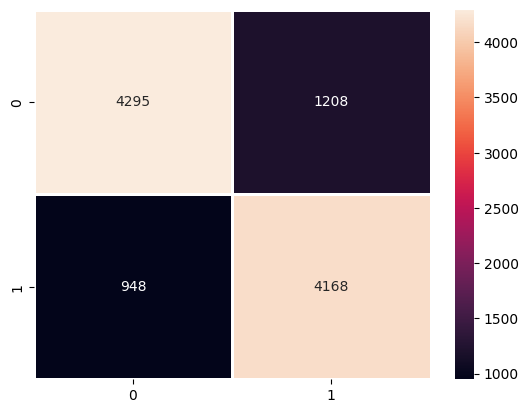

In [59]:
sns.heatmap((confusion_matrix(predicciones_reglog,y_test_ros)),linewidths=1,annot=True,fmt="d")

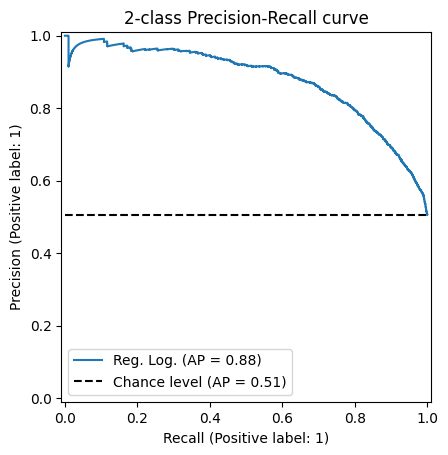

In [16]:
display = PrecisionRecallDisplay.from_estimator(
    reglog_clf,X_test_ros, y_test_ros, name="Reg. Log.", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

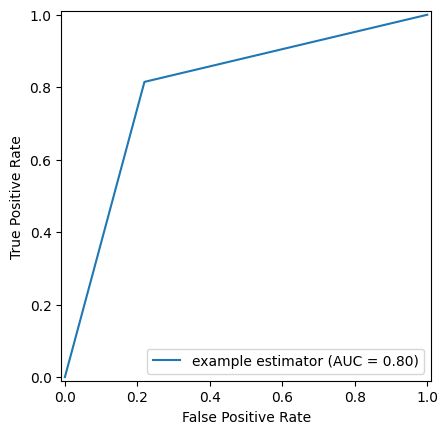

In [24]:
fpr, tpr, thresholds = metrics.roc_curve(predicciones_reglog,y_test_ros)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [38]:
from sklearn.inspection import permutation_importance
model_fi = permutation_importance(reglog_clf, X_train_ros, y_train_ros)
print(X_train_ros.columns)
model_fi['importances_mean'].round(3)

Index(['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'male', 'Dropout',
       'white', 'other', 'asian', 'black', 'hisp', 'tier', 'indxgrp', 'gpa'],
      dtype='object')


array([0.   , 0.018, 0.001, 0.201, 0.011, 0.001, 0.001, 0.   , 0.004,
       0.   , 0.001, 0.   , 0.   , 0.012, 0.003, 0.001])

4. Modelo SVC

In [42]:
print(f"AUC: "+str(accuracy_score(predicciones_svc,y_test_ros)))
print(f"F1-Score:"+str(f1_score(predicciones_svc,y_test_ros)))
print(f"Precision Score: "+str(precision_score(predicciones_svc,y_test_ros)))
print(f"Recall Score: "+str(recall_score(predicciones_svc,y_test_ros)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_svc,y_test_ros)))
print(f"ROC: "+str(roc_curve(predicciones_svc,y_test_ros)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_svc,y_test_ros)))
print(f"Specificity: "+str(recall_score(predicciones_svc,y_test_ros,pos_label=0)))

AUC: 0.49656276485544776
F1-Score:0.31303006939090205
Precision Score: 0.2265625
Recall Score: 0.5062344139650873
ROC-AUC Score: 0.499981933635411
ROC: (array([0.        , 0.50627055, 1.        ]), array([0.        , 0.50623441, 1.        ]), array([inf,  1.,  0.]))
Precision Recall: (array([0.22657501, 0.2265625 , 1.        ]), array([1.        , 0.50623441, 0.        ]), array([0, 1], dtype=int64))
Specificity: 0.4937294533057348


<Axes: >

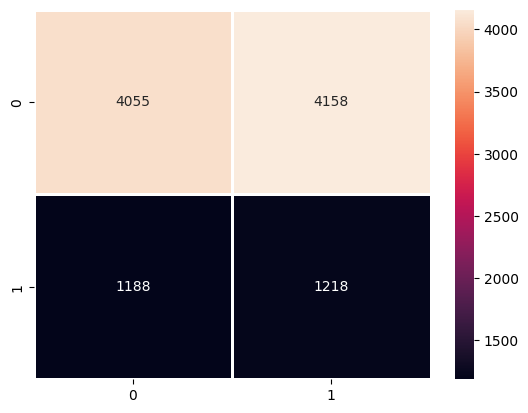

In [61]:
sns.heatmap((confusion_matrix(predicciones_svc,y_test_ros)),linewidths=1,annot=True,fmt="d")

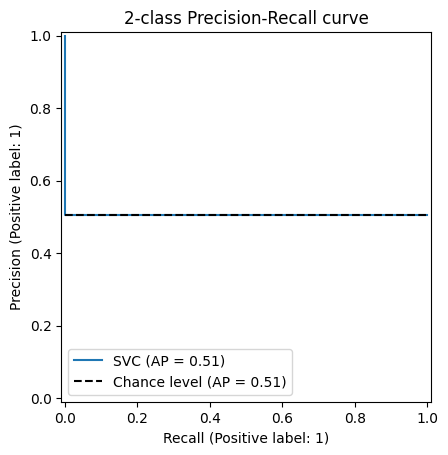

In [18]:
display = PrecisionRecallDisplay.from_estimator(
    svc_clf,X_test_ros, y_test_ros, name="SVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

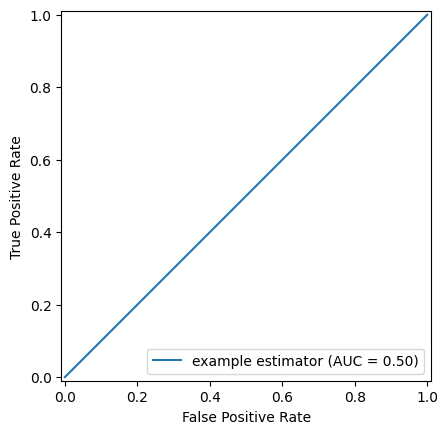

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(predicciones_svc,y_test_ros)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [50]:
model_fi = permutation_importance(svc_clf, X_train_ros, y_train_ros)
print(X_train_ros.columns)
model_fi['importances_mean'].round(4)

Index(['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'male', 'Dropout',
       'white', 'other', 'asian', 'black', 'hisp', 'tier', 'indxgrp', 'gpa'],
      dtype='object')


array([-0.0036, -0.0001,  0.    ,  0.0001, -0.    , -0.    , -0.0003,
        0.    , -0.0002,  0.    ,  0.    , -0.0001,  0.    , -0.0002,
        0.    ,  0.    ])

5. Modelo KNN

In [43]:
print(f"AUC: "+str(accuracy_score(predicciones_knn,y_test_ros)))
print(f"F1-Score:"+str(f1_score(predicciones_knn,y_test_ros)))
print(f"Precision Score: "+str(precision_score(predicciones_knn,y_test_ros)))
print(f"Recall Score: "+str(recall_score(predicciones_knn,y_test_ros)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_knn,y_test_ros)))
print(f"ROC: "+str(roc_curve(predicciones_knn,y_test_ros)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_knn,y_test_ros)))
print(f"Specificity: "+str(recall_score(predicciones_knn,y_test_ros,pos_label=0)))

AUC: 0.978246539222149
F1-Score:0.9780439121756487
Precision Score: 0.95703125
Recall Score: 1.0
ROC-AUC Score: 0.9789002557544757
ROC: (array([0.        , 0.04219949, 1.        ]), array([0., 1., 1.]), array([inf,  1.,  0.]))
Precision Recall: (array([0.4845089 , 0.95703125, 1.        ]), array([1., 1., 0.]), array([0, 1], dtype=int64))
Specificity: 0.9578005115089514


<Axes: >

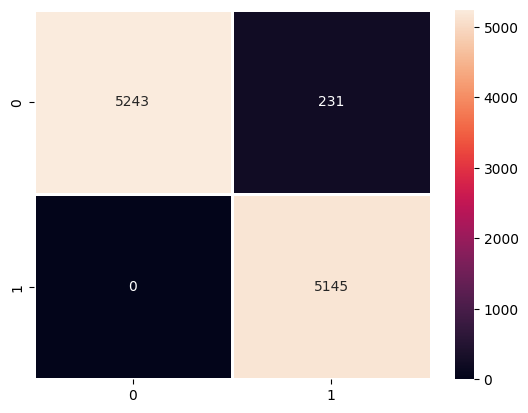

In [63]:
sns.heatmap((confusion_matrix(predicciones_knn,y_test_ros)),linewidths=1,annot=True,fmt="d")

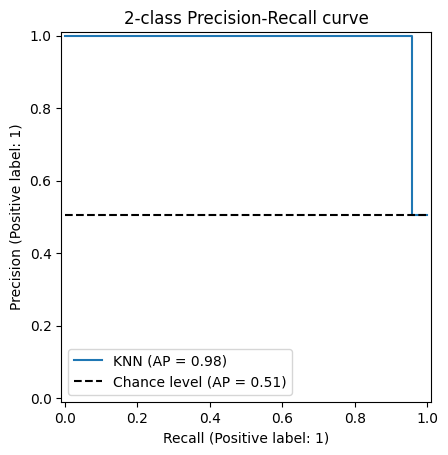

In [19]:
display = PrecisionRecallDisplay.from_estimator(
    knn_clf,X_test_ros, y_test_ros, name="KNN", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

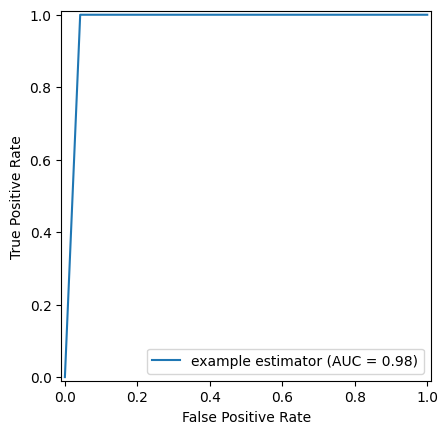

In [26]:
fpr, tpr, thresholds = metrics.roc_curve(predicciones_knn,y_test_ros)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

1. Modelo KMeans

In [44]:
print(f"AUC: "+str(accuracy_score(predicciones_km,y_test_ros)))
print(f"F1-Score:"+str(f1_score(predicciones_km,y_test_ros)))
print(f"Precision Score: "+str(precision_score(predicciones_km,y_test_ros)))
print(f"Recall Score: "+str(recall_score(predicciones_km,y_test_ros)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_km,y_test_ros)))
print(f"ROC: "+str(roc_curve(predicciones_km,y_test_ros)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_km,y_test_ros)))
print(f"Specificity: "+str(recall_score(predicciones_km,y_test_ros,pos_label=0)))

AUC: 0.5158677841604671
F1-Score:0.6764020897589224
Precision Score: 0.9994419642857143
Recall Score: 0.5111787651032252
ROC-AUC Score: 0.7417004936627237
ROC: (array([0.        , 0.02777778, 1.        ]), array([0.        , 0.51117877, 1.        ]), array([inf,  1.,  0.]))
Precision Recall: (array([0.98982955, 0.99944196, 1.        ]), array([1.        , 0.51117877, 0.        ]), array([0, 1], dtype=int64))
Specificity: 0.9722222222222222


<Axes: >

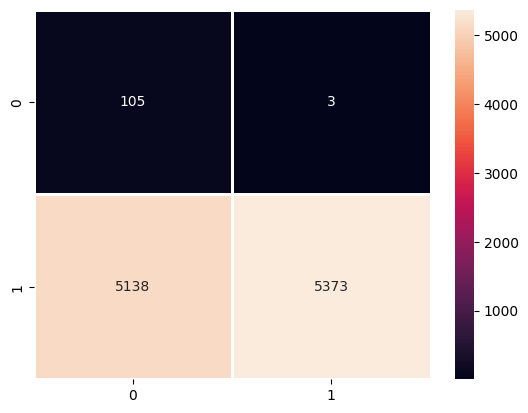

In [65]:
sns.heatmap((confusion_matrix(predicciones_km,y_test_ros)),linewidths=1,annot=True,fmt="d")

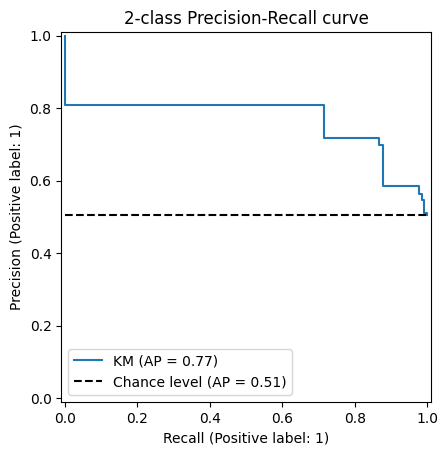

In [20]:
display = PrecisionRecallDisplay.from_estimator(
    km_clf,X_test_ros, y_test_ros, name="KM", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

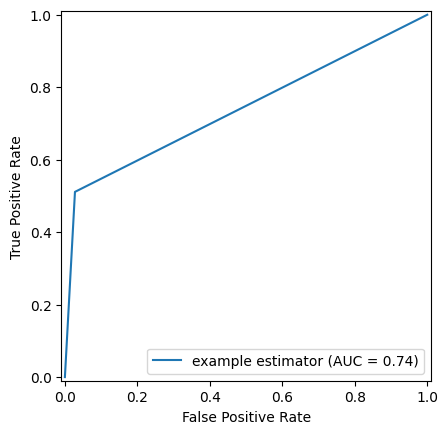

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(predicciones_km,y_test_ros)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [52]:
from sklearn.inspection import permutation_importance
model_fi = permutation_importance(km_clf, X_train_ros, y_train_ros)
print(X_train_ros.columns)
model_fi['importances_mean'].round(3)

Index(['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'male', 'Dropout',
       'white', 'other', 'asian', 'black', 'hisp', 'tier', 'indxgrp', 'gpa'],
      dtype='object')


array([0.   , 0.007, 0.   , 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ])

Vamos a guardar los modelos de cada tipo. Esta será la primera versión de cada uno de ellos, aunque solamente nos quedaremos y desarrollaremos uno.

In [73]:
import pickle 
with open(f'trained_model_tree_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(tree_clf, archivo_salida)
with open(f'trained_model_forest_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(forest_clf, archivo_salida)
with open(f'trained_model_reglog_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(reglog_clf, archivo_salida)
with open(f'trained_model_svc_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(svc_clf, archivo_salida)
with open(f'trained_model_knn_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(knn_clf, archivo_salida)
with open(f'trained_model_km_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(km_clf, archivo_salida)

Modelos entrenados con datos controversiales (train_ryg): 

In [42]:
import pickle 
tree_clf = pickle.load(open('../models/trained_w_data_controv/trained_model_tree_clf.pkl', 'rb'))
forest_clf= pickle.load(open('../models/trained_w_data_controv/trained_model_forest_cfl.pkl', 'rb'))
reglog_clf = pickle.load(open('../models/trained_w_data_controv/trained_model_reglog_cfl.pkl', 'rb'))
svc_clf = pickle.load(open('../models/trained_w_data_controv/trained_model_svc_cfl.pkl', 'rb'))
knn_clf = pickle.load(open('../models/trained_w_data_controv/trained_model_knn_cfl.pkl', 'rb'))
km_clf = pickle.load(open('../models/trained_w_data_controv/trained_model_km_cfl.pkl', 'rb'))

Modelos no entrenados:

In [72]:
import pickle 
with open(f'untrained_model_tree_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(tree_clf_puro, archivo_salida)
with open(f'untrained_model_forest_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(forest_clf_puro, archivo_salida)
with open(f'untrained_model_reglog_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(reglog_clf_puro, archivo_salida)
with open(f'untrained_model_svc_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(svc_clf_puro, archivo_salida)
with open(f'untrained_model_knn_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(knn_clf_puro, archivo_salida)
with open(f'untrained_model_km_cfl.pkl',"wb") as archivo_salida:
        pickle.dump(km_clf_puro, archivo_salida)

In [17]:
import pickle 
tree_clf_puro = pickle.load(open('../models/untrained/untrained_model_tree_cfl.pkl', 'rb'))
forest_clf_puro= pickle.load(open('../models/untrained/untrained_model_forest_cfl.pkl', 'rb'))
reglog_clf_puro = pickle.load(open('../models/untrained/untrained_model_reglog_cfl.pkl', 'rb'))
svc_clf_puro = pickle.load(open('../models/untrained/untrained_model_svc_cfl.pkl', 'rb'))
knn_clf_puro = pickle.load(open('../models/untrained/untrained_model_knn_cfl.pkl', 'rb'))
km_clf_puro= pickle.load(open('../models/untrained/untrained_model_km_cfl.pkl', 'rb'))

Sus hiperparametros:

In [25]:
import yaml
with open("hyperparameters_model_tree_clf.yaml", "w") as file:
    yaml.dump(tree_clf_puro.get_params(), file, default_flow_style=False)
with open("hyperparameters_model_forest_clf.yaml", "w") as file:
    yaml.dump(forest_clf_puro.get_params(), file, default_flow_style=False)
with open("hyperparameters_model_reglog_clf.yaml", "w") as file:
    yaml.dump(reglog_clf_puro.get_params(), file, default_flow_style=False)
with open("hyperparameters_model_svc_clf.yaml", "w") as file:
    yaml.dump(svc_clf_puro.get_params(), file, default_flow_style=False)
with open("hyperparameters_model_knn_clf.yaml", "w") as file:
    yaml.dump(knn_clf_puro.get_params(), file, default_flow_style=False)
with open("hyperparameters_model_km_clf.yaml", "w") as file:
    yaml.dump(km_clf_puro.get_params(), file, default_flow_style=False)

Lo siguiente es ver cómo funcionara cada uno de los modelos con los datos que tenemos, pero eliminando las features controversiales.

In [16]:
X_train_ryg.columns

Index(['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'male', 'Dropout',
       'white', 'other', 'asian', 'black', 'hisp', 'tier', 'indxgrp', 'gpa'],
      dtype='object')

In [17]:
X_train_ros.columns

Index(['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'male', 'Dropout',
       'white', 'other', 'asian', 'black', 'hisp', 'tier', 'indxgrp', 'gpa'],
      dtype='object')

In [54]:
X_train_nocontrov=X_train_ryg.drop(["male","white","other","asian","black","hisp"],axis=1)
X_test_nocontrov=X_test_ryg.drop(["male","white","other","asian","black","hisp"],axis=1)
X_train_ros_nocontrov=X_train_ros.drop(["male","white","other","asian","black","hisp"],axis=1)
X_test_ros_nocontrov=X_test_ros.drop(["male","white","other","asian","black","hisp"],axis=1)

Vamos a guardar estos datos:

In [16]:
X_train_nocontrov.to_csv("../data/train/datos_procesados_X_train_nocontrov.csv",index=False)
X_test_nocontrov.to_csv("../data/test/datos_procesados_X_test_nocontrov.csv",index=False)
X_train_ros_nocontrov.to_csv("../data/train/datos_procesados_X_train_ros_nocontrov.csv",index=False)
X_test_ros_nocontrov.to_csv("../data/test/datos_procesados_X_test_ros_nocontrov.csv",index=False)

In [17]:
tree_clf_puro.fit(X_train_nocontrov,y_train_ryg)
tree_clf_sincontr=tree_clf_puro.best_estimator_
print(tree_clf_sincontr.score(X_train_nocontrov,y_train_ryg))
tree_clf_sincontr.score(X_test_nocontrov,y_test_ryg)

0.9479321630467122


0.9509103891467333

In [22]:
forest_clf_puro.fit(X_train_nocontrov,y_train_ryg)
forest_clf_sincontr=forest_clf_puro.best_estimator_
print(forest_clf_sincontr.score(X_train_nocontrov,y_train_ryg))
forest_clf_sincontr.score(X_test_nocontrov,y_test_ryg)

0.946861053257959


0.9507318814709033

In [24]:
reglog_clf_puro.fit(X_train_nocontrov,y_train_ryg)
reglog_clf_sincontr=reglog_clf_puro.best_estimator_
print(reglog_clf_sincontr.score(X_train_nocontrov,y_train_ryg))
reglog_clf_sincontr.score(X_test_nocontrov,y_test_ryg)

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave 

0.9480511752454627


0.9501963584434131

Parece que con SVC hay una mejora sustancial quitando los datos controversiales, seguramente es por la forma en que funciona el modelo.

In [25]:
svc_clf_puro.fit(X_train_nocontrov,y_train_ryg)
svc_clf_sincontr=svc_clf_puro.best_estimator_
print(svc_clf_sincontr.score(X_train_nocontrov,y_train_ryg))
svc_clf_sincontr.score(X_test_nocontrov,y_test_ryg)

0.5597738768223743


c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Compe

0.5553373795073188

En este modelo tenemos un overfitting con los datos de train pero no con los de test. Deberemos ver esto más detenidamente.

In [27]:
knn_clf_puro.fit(X_train_nocontrov,y_train_ryg)
knn_clf_sincontr=knn_clf_puro.best_estimator_
print(knn_clf_sincontr.score(X_train_nocontrov,y_train_ryg))
knn_clf_sincontr.score(X_test_nocontrov,y_test_ryg)

1.0


0.9257408068546947

In [29]:
km_clf_puro.fit(X_train_nocontrov,y_train_ryg)
km_clf_sincontr=km_clf_puro.best_estimator_
print(km_clf_sincontr.score(X_train_nocontrov,y_train_ryg))
km_clf_sincontr.score(X_test_nocontrov,y_test_ryg)

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


-264477654331.08337


c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py", line 666, 

-88005411160.06898

Hagamos lo mismo, pero con los datos no controversiales con oversampling.

In [53]:
import pickle 
tree_clf_puro = pickle.load(open('../models/untrained/untrained_model_tree_cfl.pkl', 'rb'))
forest_clf_puro= pickle.load(open('../models/untrained/untrained_model_forest_cfl.pkl', 'rb'))
reglog_clf_puro = pickle.load(open('../models/untrained/untrained_model_reglog_cfl.pkl', 'rb'))
svc_clf_puro = pickle.load(open('../models/untrained/untrained_model_svc_cfl.pkl', 'rb'))
knn_clf_puro = pickle.load(open('../models/untrained/untrained_model_knn_cfl.pkl', 'rb'))
km_clf_puro= pickle.load(open('../models/untrained/untrained_model_km_cfl.pkl', 'rb'))

In [55]:
tree_clf_puro.fit(X_train_ros_nocontrov,y_train_ros)
tree_clf_sincontr=tree_clf_puro.best_estimator_
print(tree_clf_sincontr.score(X_train_ros_nocontrov,y_train_ros))
tree_clf_sincontr.score(X_test_ros_nocontrov,y_test_ros)

0.790783815174059


0.7922591581128167

In [56]:
forest_clf_puro.fit(X_train_ros_nocontrov,y_train_ros)
forest_clf_sincontr=forest_clf_puro.best_estimator_
print(forest_clf_sincontr.score(X_train_ros_nocontrov,y_train_ros))
forest_clf_sincontr.score(X_test_ros_nocontrov,y_test_ros)

0.7765640204664594


0.7760617760617761

In [57]:
reglog_clf_puro.fit(X_train_ros_nocontrov,y_train_ros)
reglog_clf_sincontr=reglog_clf_puro.best_estimator_
print(reglog_clf_sincontr.score(X_train_ros_nocontrov,y_train_ros))
reglog_clf_sincontr.score(X_test_ros_nocontrov,y_test_ros)

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave 

0.7974071632608218


0.7973443827102363

In [58]:
svc_clf_puro.fit(X_train_ros_nocontrov,y_train_ros)
svc_clf_sincontr=svc_clf_puro.best_estimator_

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=15).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\traba\Desktop\Compe

In [59]:
print(svc_clf_sincontr.score(X_train_ros_nocontrov,y_train_ros))
svc_clf_sincontr.score(X_test_ros_nocontrov,y_test_ros)

0.5039080892739429


0.4991995479800358

In [60]:
knn_clf_puro.fit(X_train_ros_nocontrov,y_train_ros)
knn_clf_sincontr=knn_clf_puro.best_estimator_
print(knn_clf_sincontr.score(X_train_ros_nocontrov,y_train_ros))
knn_clf_sincontr.score(X_test_ros_nocontrov,y_test_ros)

1.0


0.9779640267445145

In [61]:
km_clf_puro.fit(X_train_ros_nocontrov,y_train_ros)
km_clf_sincontr=km_clf_puro.best_estimator_
print(km_clf_sincontr.score(X_train_ros_nocontrov,y_train_ros))
km_clf_sincontr.score(X_test_ros_nocontrov,y_test_ros)

c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


-492934505824.7763


c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\traba\Desktop\Competiciones Kaggle\.conda\lib\site-packages\sklearn\base.py", line 666, 

-164980259248.7169

Guardemos estos modelos:

In [62]:
with open(f'trained_model_tree_cfl_w_data_no_controv.pkl',"wb") as archivo_salida:
        pickle.dump(tree_clf_puro, archivo_salida)
with open(f'untrained_model_forest_cfl_w_data_no_controv.pkl',"wb") as archivo_salida:
        pickle.dump(forest_clf_puro, archivo_salida)
with open(f'untrained_model_reglog_cfl_w_data_no_controv.pkl',"wb") as archivo_salida:
        pickle.dump(reglog_clf_puro, archivo_salida)
with open(f'untrained_model_svc_cfl_w_data_no_controv.pkl',"wb") as archivo_salida:
        pickle.dump(svc_clf_puro, archivo_salida)
with open(f'untrained_model_knn_cfl_w_data_no_controv.pkl',"wb") as archivo_salida:
        pickle.dump(knn_clf_puro, archivo_salida)
with open(f'untrained_model_km_cfl_w_data_no_controv.pkl',"wb") as archivo_salida:
        pickle.dump(km_clf_puro, archivo_salida)

In [63]:
predicciones_tree_nocontr=tree_clf_sincontr.predict(X_test_nocontrov)
predicciones_forest_nocontr=forest_clf_sincontr.predict(X_test_nocontrov)
predicciones_reglog_nocontr=reglog_clf_sincontr.predict(X_test_ros_nocontrov)
predicciones_svc_nocontr=svc_clf_sincontr.predict(X_test_ros_nocontrov)
predicciones_knn_nocontr=knn_clf_sincontr.predict(X_test_ros_nocontrov)
predicciones_km_nocontr=km_clf_sincontr.predict(X_test_ros_nocontrov)

1. Modelo Tree

In [56]:
print(f"AUC: "+str(accuracy_score(predicciones_tree_nocontr,y_test_ryg)))
print(f"F1-Score:"+str(f1_score(predicciones_tree_nocontr,y_test_ryg)))
print(f"Precision Score: "+str(precision_score(predicciones_tree_nocontr,y_test_ryg)))
print(f"Recall Score: "+str(recall_score(predicciones_tree_nocontr,y_test_ryg)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_tree_nocontr,y_test_ryg)))
print(f"ROC: "+str(roc_curve(predicciones_tree_nocontr,y_test_ryg)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_tree_nocontr,y_test_ryg)))
print(f"Specifity: "+str(recall_score(predicciones_tree_nocontr,y_test_ryg,pos_label=0)))

AUC: 0.7781149589432346
F1-Score:0.8694190566235949
Precision Score: 0.7767974469682748
Recall Score: 0.987118320610687
ROC-AUC Score: 0.5719279546315846
ROC: (array([0.        , 0.84326241, 1.        ]), array([0.        , 0.98711832, 1.        ]), array([inf,  1.,  0.]))
Precision Recall: (array([0.74830418, 0.77679745, 1.        ]), array([1.        , 0.98711832, 0.        ]), array([0, 1], dtype=int64))
Specifity: 0.15673758865248227


<Axes: >

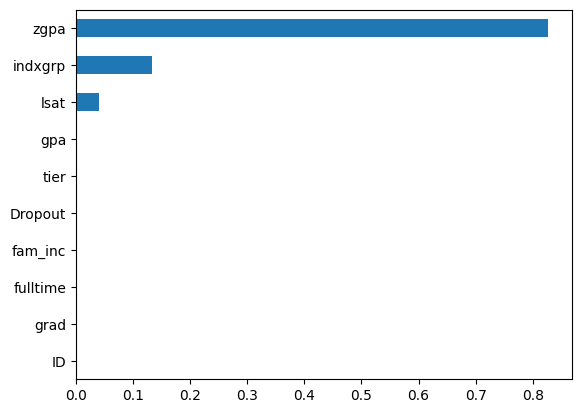

In [73]:
feat_importances = pd.Series(tree_clf_sincontr.feature_importances_, index = X_train_ros_nocontrov.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')

2. Modelo Forest

In [57]:
print(f"AUC: "+str(accuracy_score(predicciones_forest_nocontr,y_test_ryg)))
print(f"F1-Score:"+str(f1_score(predicciones_forest_nocontr,y_test_ryg)))
print(f"Precision Score: "+str(precision_score(predicciones_forest_nocontr,y_test_ryg)))
print(f"Recall Score: "+str(recall_score(predicciones_forest_nocontr,y_test_ryg)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_forest_nocontr,y_test_ryg)))
print(f"ROC: "+str(roc_curve(predicciones_forest_nocontr,y_test_ryg)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_forest_nocontr,y_test_ryg)))
print(f"Specifity: "+str(recall_score(predicciones_forest_nocontr,y_test_ryg,pos_label=0)))

AUC: 0.7629418064976794
F1-Score:0.8595006347862886
Precision Score: 0.7625305049746574
Recall Score: 0.9847272727272727
ROC-AUC Score: 0.5641307318274142
ROC: (array([0.        , 0.85646581, 1.        ]), array([0.        , 0.98472727, 1.        ]), array([inf,  1.,  0.]))
Precision Recall: (array([0.73634416, 0.7625305 , 1.        ]), array([1.        , 0.98472727, 0.        ]), array([0, 1], dtype=int64))
Specifity: 0.14353419092755584


<Axes: >

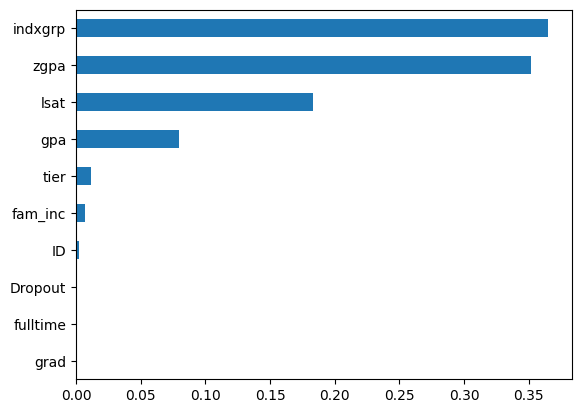

In [74]:
feat_importances = pd.Series(forest_clf_sincontr.feature_importances_, index = X_train_ros_nocontrov.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')

3. Modelo Reg. Log.

In [58]:
print(f"AUC: "+str(accuracy_score(predicciones_reglog_nocontr,y_test_ros)))
print(f"F1-Score:"+str(f1_score(predicciones_reglog_nocontr,y_test_ros)))
print(f"Precision Score: "+str(precision_score(predicciones_reglog_nocontr,y_test_ros)))
print(f"Recall Score: "+str(recall_score(predicciones_reglog_nocontr,y_test_ros)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_reglog_nocontr,y_test_ros)))
print(f"ROC: "+str(roc_curve(predicciones_reglog_nocontr,y_test_ros)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_reglog_nocontr,y_test_ros)))
print(f"Specifity: "+str(recall_score(predicciones_reglog_nocontr,y_test_ros,pos_label=0)))

AUC: 0.7973443827102363
F1-Score:0.795047619047619
Precision Score: 0.7764136904761905
Recall Score: 0.8145979703356753
ROC-AUC Score: 0.7979268286619232
ROC: (array([0.        , 0.21874431, 1.        ]), array([0.        , 0.81459797, 1.        ]), array([inf,  1.,  0.]))
Precision Recall: (array([0.48253131, 0.77641369, 1.        ]), array([1.        , 0.81459797, 0.        ]), array([0, 1], dtype=int64))
Specifity: 0.781255686988171


In [67]:
model_fi = permutation_importance(reglog_clf_sincontr, X_train_ros_nocontrov, y_train_ros)
print(X_train_ros_nocontrov.columns)
model_fi['importances_mean'].round(3)

Index(['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'Dropout', 'tier',
       'indxgrp', 'gpa'],
      dtype='object')


array([ 0.   ,  0.019,  0.   ,  0.203,  0.01 ,  0.002, -0.   ,  0.01 ,
        0.004, -0.   ])

4. Modelo SVC

In [59]:
print(f"AUC: "+str(accuracy_score(predicciones_svc_nocontr,y_test_ros)))
print(f"F1-Score:"+str(f1_score(predicciones_svc_nocontr,y_test_ros)))
print(f"Precision Score: "+str(precision_score(predicciones_svc_nocontr,y_test_ros)))
print(f"Recall Score: "+str(recall_score(predicciones_svc_nocontr,y_test_ros)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_svc_nocontr,y_test_ros)))
print(f"ROC: "+str(roc_curve(predicciones_svc_nocontr,y_test_ros)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_svc_nocontr,y_test_ros)))
print(f"Specifity: "+str(recall_score(predicciones_svc_nocontr,y_test_ros,pos_label=0)))

AUC: 0.4991995479800358
F1-Score:0.4965921999242711
Precision Score: 0.48790922619047616
Recall Score: 0.5055898226676947
ROC-AUC Score: 0.49934250846144823
ROC: (array([0.        , 0.50690481, 1.        ]), array([0.        , 0.50558982, 1.        ]), array([inf,  1.,  0.]))
Precision Recall: (array([0.48855824, 0.48790923, 1.        ]), array([1.        , 0.50558982, 0.        ]), array([0, 1], dtype=int64))
Specifity: 0.4930951942552016


In [69]:
model_fi = permutation_importance(svc_clf_sincontr, X_train_ros_nocontrov, y_train_ros)
print(X_train_ros_nocontrov.columns)
model_fi['importances_mean'].round(4)

Index(['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'Dropout', 'tier',
       'indxgrp', 'gpa'],
      dtype='object')


array([ 0.0064, -0.0001,  0.    ,  0.0001, -0.    , -0.    ,  0.    ,
        0.0002,  0.0001, -0.    ])

5. Modelo KNN

In [60]:
print(f"AUC: "+str(accuracy_score(predicciones_knn_nocontr,y_test_ros)))
print(f"F1-Score:"+str(f1_score(predicciones_knn_nocontr,y_test_ros)))
print(f"Precision Score: "+str(precision_score(predicciones_knn_nocontr,y_test_ros)))
print(f"Recall Score: "+str(recall_score(predicciones_knn_nocontr,y_test_ros)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_knn_nocontr,y_test_ros)))
print(f"ROC: "+str(roc_curve(predicciones_knn_nocontr,y_test_ros)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_knn_nocontr,y_test_ros)))
print(f"Specifity: "+str(recall_score(predicciones_knn_nocontr,y_test_ros,pos_label=0)))

AUC: 0.9779640267445145
F1-Score:0.9777524244152881
Precision Score: 0.9564732142857143
Recall Score: 1.0
ROC-AUC Score: 0.978637940478364
ROC: (array([0.        , 0.04272412, 1.        ]), array([0., 1., 1.]), array([inf,  1.,  0.]))
Precision Recall: (array([0.48422639, 0.95647321, 1.        ]), array([1., 1., 0.]), array([0, 1], dtype=int64))
Specifity: 0.9572758809567281


1. Modelo KMeans

In [61]:
print(f"AUC: "+str(accuracy_score(predicciones_km_nocontr,y_test_ros)))
print(f"F1-Score:"+str(f1_score(predicciones_km_nocontr,y_test_ros)))
print(f"Precision Score: "+str(precision_score(predicciones_km_nocontr,y_test_ros)))
print(f"Recall Score: "+str(recall_score(predicciones_km_nocontr,y_test_ros)))
print(f"ROC-AUC Score: "+str(roc_auc_score(predicciones_km_nocontr,y_test_ros)))
print(f"ROC: "+str(roc_curve(predicciones_km_nocontr,y_test_ros)))
print(f"Precision Recall: "+str(precision_recall_curve(predicciones_km_nocontr,y_test_ros)))
print(f"Specifity: "+str(recall_score(predicciones_km_nocontr,y_test_ros,pos_label=0)))

AUC: 0.501365476975233
F1-Score:0.5016470588235294
Precision Score: 0.49572172619047616
Recall Score: 0.5077157553819776
ROC-AUC Score: 0.5014370210801881
ROC: (array([0.        , 0.50484171, 1.        ]), array([0.        , 0.50771576, 1.        ]), array([inf,  1.,  0.]))
Precision Recall: (array([0.49430267, 0.49572173, 1.        ]), array([1.        , 0.50771576, 0.        ]), array([0, 1], dtype=int64))
Specifity: 0.4951582867783985


In [72]:
model_fi = permutation_importance(km_clf_sincontr, X_train_ros_nocontrov, y_train_ros)
print(X_train_ros_nocontrov.columns)
model_fi['importances_mean'].round(1)

Index(['ID', 'lsat', 'grad', 'zgpa', 'fulltime', 'fam_inc', 'Dropout', 'tier',
       'indxgrp', 'gpa'],
      dtype='object')


array([55.4, -0.2,  0.1, 15.7,  5.2,  1.1,  0. , 28.4, 16.8,  2.3])

Todo indica que el modelo KNN, con ambos conjuntos de datos, es el que mejor predice. Aunque los de Reg. Log., Tree y Forest también lo hacen bastante bien.